#K-Means Clustering on Iris Data

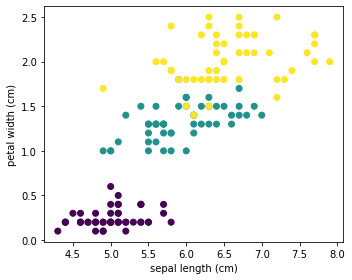

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
iris = load_iris()
x_index = 0
y_index = 3

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

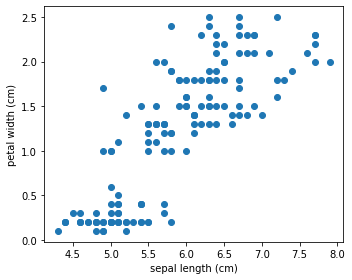

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index])
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

Initial Centers
[[5.4 3.9 1.7 0.4]
 [6.2 2.8 4.8 1.8]
 [6.1 2.6 5.6 1.4]]


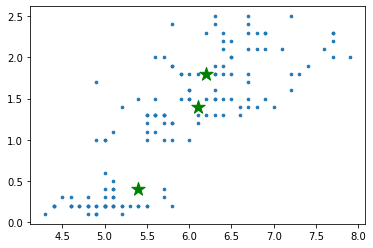


Performance Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.64      0.98      0.78        50
           2       1.00      0.46      0.63        50

    accuracy                           0.81       150
   macro avg       0.88      0.81      0.80       150
weighted avg       0.88      0.81      0.80       150


 C_old: 
 [[5.4 3.9 1.7 0.4]
 [6.2 2.8 4.8 1.8]
 [6.1 2.6 5.6 1.4]]

 C: 
 [[5.00784314 3.40980392 1.49215686 0.2627451 ]
 [6.05657895 2.825      4.59736842 1.57763158]
 [6.99130435 3.04347826 6.00869565 2.02608696]]
error:  1.455311708700232


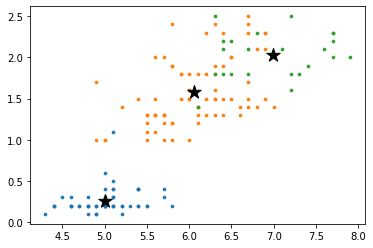


Performance Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      1.00      0.85        50
           2       1.00      0.64      0.78        50

    accuracy                           0.88       150
   macro avg       0.91      0.88      0.88       150
weighted avg       0.91      0.88      0.88       150


 C_old: 
 [[5.00784314 3.40980392 1.49215686 0.2627451 ]
 [6.05657895 2.825      4.59736842 1.57763158]
 [6.99130435 3.04347826 6.00869565 2.02608696]]

 C: 
 [[5.006      3.428      1.462      0.246     ]
 [5.95588235 2.76470588 4.46323529 1.46176471]
 [6.9125     3.1        5.846875   2.13125   ]]
error:  0.30555909949749244


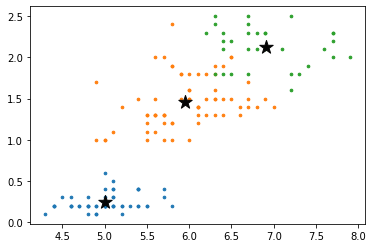


Performance Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      1.00      0.87        50
           2       1.00      0.70      0.82        50

    accuracy                           0.90       150
   macro avg       0.92      0.90      0.90       150
weighted avg       0.92      0.90      0.90       150


 C_old: 
 [[5.006      3.428      1.462      0.246     ]
 [5.95588235 2.76470588 4.46323529 1.46176471]
 [6.9125     3.1        5.846875   2.13125   ]]

 C: 
 [[5.006      3.428      1.462      0.246     ]
 [5.93230769 2.75538462 4.42923077 1.43846154]
 [6.87428571 3.08857143 5.79142857 2.11714286]]
error:  0.08488967996743155


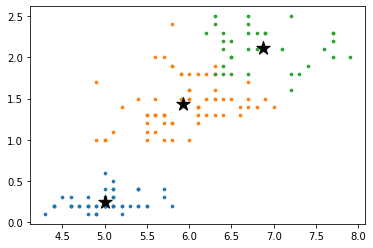


Performance Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150


 C_old: 
 [[5.006      3.428      1.462      0.246     ]
 [5.93230769 2.75538462 4.42923077 1.43846154]
 [6.87428571 3.08857143 5.79142857 2.11714286]]

 C: 
 [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
error:  0.08748693553073615


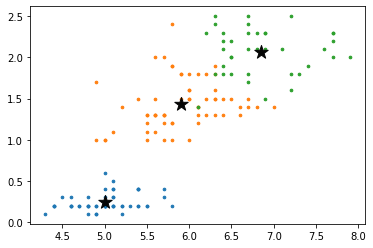


Performance Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150


 C_old: 
 [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]

 C: 
 [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
error:  0.0


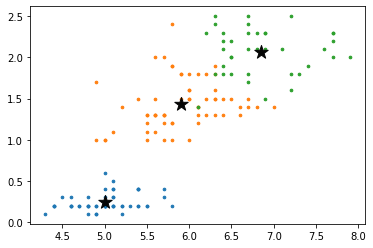

In [ ]:
from copy import deepcopy
from sklearn.metrics import classification_report

def random_sample(arr: np.array, size: int = 1) -> np.array:
    return arr[np.random.choice(len(arr), size=size, replace=False)]


def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

points = iris.data
k=3
C = random_sample(points,k)
print("Initial Centers")
print(C)

plt.scatter(points[:, x_index], points[:, y_index], s=7)
plt.scatter(C[:,x_index], C[:,y_index], marker='*', s=200, c='g')
plt.show()

C_old = np.zeros(C.shape)
cluster_label = np.zeros(len(points))
error = dist(C, C_old, None)


while error != 0.0:
    
    for i in range(len(points)):
        distances = dist(points[i], C)
        cluster = np.argmin(distances)
        cluster_label[i] = cluster
    
    C_old = deepcopy(C)
    
    for i in range(k):
        tmps = [points[j] for j in range(len(points)) if cluster_label[j] == i]
        if len(tmps)>0:
          C[i] = np.mean(tmps, axis=0)

    print('\nPerformance Report:\n')
    print(classification_report(iris.target, cluster_label))

    print('\n C_old: \n',C_old)
    print('\n C: \n',C)
    error = dist(C, C_old, None)
    print('error: ',dist(C, C_old, None))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
    fig, ax = plt.subplots()
    for i in range(k):
            tmps = np.array([points[j] for j in range(len(points)) if cluster_label[j] == i])
            if len(tmps)>0:
              ax.scatter(tmps[:, 0], tmps[:, 3], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 3], marker='*', s=200, c='#050505')
    plt.show()